Sample Customer Features (first 5 rows):
   customer_id  last_purchase_days_ago  total_orders  total_spent_usd
0            1                       5            42          1332.32
1            2                       4            38          1604.13
2            3                      12            59          1669.42
3            4                      12            51          1744.50
4            5                      14            57          1742.90

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             500 non-null    int64  
 1   last_purchase_days_ago  500 non-null    int64  
 2   total_orders            500 non-null    int64  
 3   total_spent_usd         500 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB

Scaled Features (first 5 rows):
   last_purchase

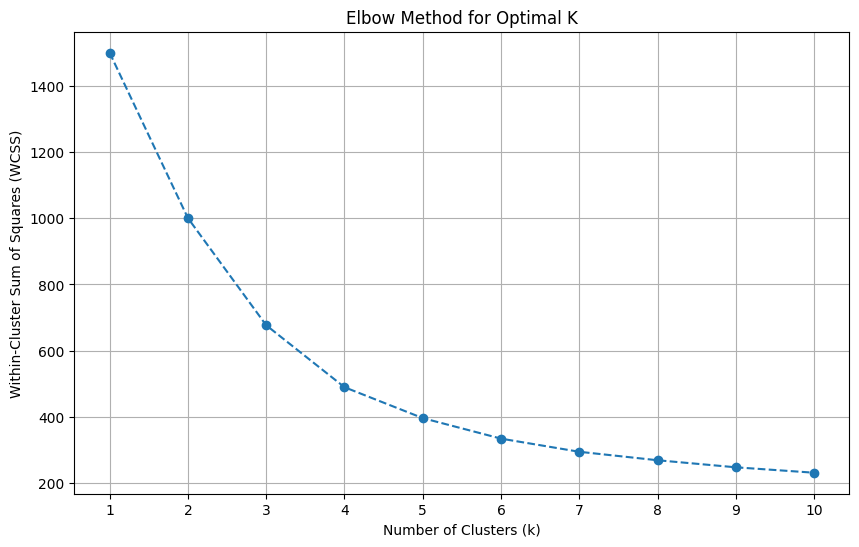


Interpret the Elbow Plot: Look for the 'bend' or 'elbow' point.
For this synthetic data, an elbow might be visible around k=3 or k=4.

K-means Clustering with k=3 complete.
Customers per Cluster:
cluster
0    143
1    141
2    216
Name: count, dtype: int64

Cluster Characteristics (Mean of Original Features):
         last_purchase_days_ago  total_orders  total_spent_usd
cluster                                                       
0                     31.713287     10.069930       367.503427
1                     34.510638     41.092199       981.426596
2                    132.384259     22.750000       479.501389


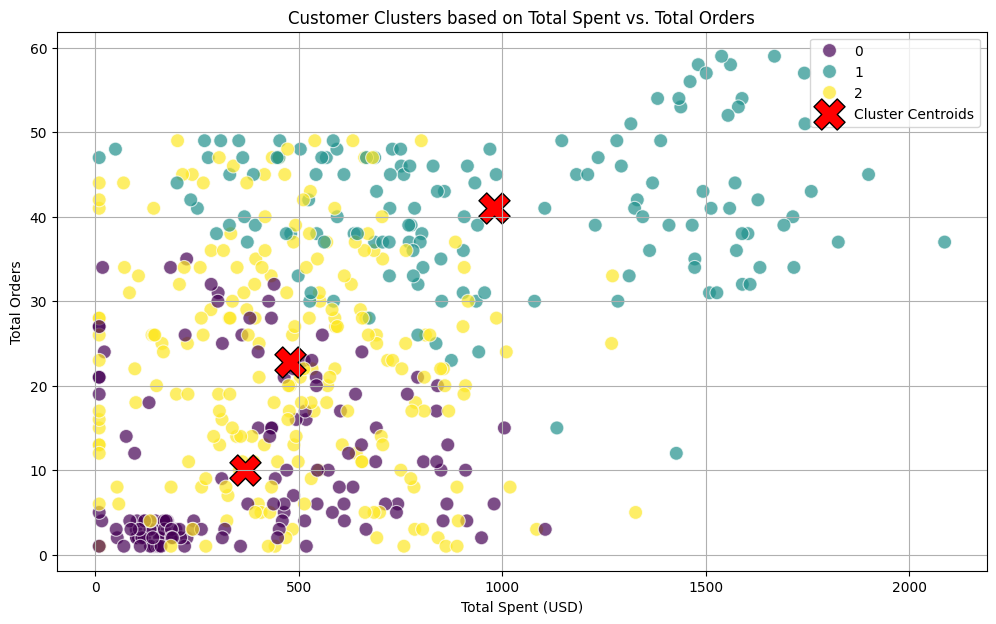


--- Actionable Insights ---
Based on the 'Cluster Characteristics' table above, you can define your customer segments:

Cluster 0:
  - Average Last Purchase Days Ago: 32 days
  - Average Total Orders: 10
  - Average Total Spent: $367.50
  - This is a 'General Customer' segment, requiring further analysis or specific targeting based on its unique profile.

Cluster 1:
  - Average Last Purchase Days Ago: 35 days
  - Average Total Orders: 41
  - Average Total Spent: $981.43
  - This is a 'General Customer' segment, requiring further analysis or specific targeting based on its unique profile.

Cluster 2:
  - Average Last Purchase Days Ago: 132 days
  - Average Total Orders: 23
  - Average Total Spent: $479.50
  - This is a 'General Customer' segment, requiring further analysis or specific targeting based on its unique profile.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

# --- 1. Simulate Customer Purchase Data (Replace with your actual data loading) ---
# In a real scenario, you would load your transaction data and then
# aggregate it to create customer-level features.

# Let's create some synthetic customer purchase history data for demonstration
np.random.seed(42)
num_customers = 500

# Simulate RFM-like features
data = {
    'customer_id': np.arange(1, num_customers + 1),
    'last_purchase_days_ago': np.random.randint(1, 180, num_customers), # Recency
    'total_orders': np.random.randint(1, 50, num_customers), # Frequency
    'total_spent_usd': np.random.normal(loc=500, scale=300, size=num_customers).round(2) # Monetary
}

# Add some clusters manually to make the example more illustrative
# Group 1: Loyal, high spenders (low recency, high frequency, high monetary)
data['last_purchase_days_ago'][0:50] = np.random.randint(1, 15, 50)
data['total_orders'][0:50] = np.random.randint(30, 60, 50)
data['total_spent_usd'][0:50] = np.random.normal(loc=1500, scale=200, size=50).round(2)

# Group 2: New customers (low recency, low frequency, moderate monetary)
data['last_purchase_days_ago'][50:100] = np.random.randint(1, 30, 50)
data['total_orders'][50:100] = np.random.randint(1, 5, 50)
data['total_spent_usd'][50:100] = np.random.normal(loc=150, scale=50, size=50).round(2)


df = pd.DataFrame(data)

# Ensure no negative spending
df['total_spent_usd'] = df['total_spent_usd'].apply(lambda x: max(x, 10))

print("Sample Customer Features (first 5 rows):")
print(df.head())
print("\nDataFrame Info:")
df.info()

# --- 2. Feature Engineering (if starting from raw transactions) ---
# If you had raw transaction data like this:
# transactions_df = pd.DataFrame({
#     'customer_id': [1, 1, 2, 3, 2, 1],
#     'transaction_date': pd.to_datetime(['2023-01-01', '2023-01-10', '2023-02-05', '2023-01-15', '2023-03-01', '2023-04-20']),
#     'amount': [100, 50, 200, 75, 120, 30]
# })
#
# # Example of creating RFM features:
# from datetime import datetime
# snapshot_date = datetime(2023, 5, 1) # Define a snapshot date for recency calculation
#
# rfm_df = transactions_df.groupby('customer_id').agg(
#     Recency=('transaction_date', lambda date: (snapshot_date - date.max()).days),
#     Frequency=('transaction_date', 'nunique'), # Number of unique transaction dates
#     Monetary=('amount', 'sum')
# ).reset_index()
#
# df = rfm_df # Then use rfm_df as your main DataFrame for clustering

# For this example, our `df` already contains the engineered features.
features = ['last_purchase_days_ago', 'total_orders', 'total_spent_usd']
X = df[features]

# --- 3. Scale the Features ---
# Important for K-means because it relies on distance calculations.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("\nScaled Features (first 5 rows):")
print(X_scaled_df.head())

# --- 4. Determine Optimal Number of Clusters (k) using Elbow Method ---
wcss = []
K_range = range(1, 11) # Test k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init to suppress warning
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia is the WCSS

plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid(True)
plt.show()

print("\nInterpret the Elbow Plot: Look for the 'bend' or 'elbow' point.")
print("For this synthetic data, an elbow might be visible around k=3 or k=4.")


# --- 5. Apply K-means Clustering with the Chosen K ---
# Let's assume from the elbow plot (or business knowledge) that k=3 is suitable.
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

print(f"\nK-means Clustering with k={optimal_k} complete.")
print("Customers per Cluster:")
print(df['cluster'].value_counts().sort_index())

# --- 6. Analyze and Interpret Clusters ---
# Calculate the mean of original (unscaled) features for each cluster
cluster_centers_original_scale = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
cluster_centers_original_scale['cluster'] = range(optimal_k)
cluster_centers_original_scale = cluster_centers_original_scale.set_index('cluster')

print("\nCluster Characteristics (Mean of Original Features):")
print(cluster_centers_original_scale)

# Visualize the clusters (example for 2 features or using pairplot)
# For more than 2 features, dimensionality reduction (PCA) is useful for 2D plots.

# Example: Scatter plot of two features, colored by cluster
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='total_spent_usd', y='total_orders', hue='cluster', palette='viridis', s=100, alpha=0.7)
plt.scatter(cluster_centers_original_scale['total_spent_usd'], cluster_centers_original_scale['total_orders'],
            marker='X', s=500, color='red', label='Cluster Centroids', edgecolor='black')
plt.title("Customer Clusters based on Total Spent vs. Total Orders")
plt.xlabel("Total Spent (USD)")
plt.ylabel("Total Orders")
plt.legend()
plt.grid(True)
plt.show()

# You can also use pairplot for a quick look at relationships
# sns.pairplot(df, hue='cluster', vars=features, palette='viridis')
# plt.suptitle("Pairplot of Features by Cluster", y=1.02)
# plt.show()

# --- 7. Actionable Insights and Next Steps ---
print("\n--- Actionable Insights ---")
print("Based on the 'Cluster Characteristics' table above, you can define your customer segments:")
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    row = cluster_centers_original_scale.loc[i]
    print(f"  - Average Last Purchase Days Ago: {row['last_purchase_days_ago']:.0f} days")
    print(f"  - Average Total Orders: {row['total_orders']:.0f}")
    print(f"  - Average Total Spent: ${row['total_spent_usd']:.2f}")

    # Example interpretations (you'd tailor these to your actual data):
    if row['last_purchase_days_ago'] < 30 and row['total_orders'] > 20 and row['total_spent_usd'] > 1000:
        print("  - This cluster likely represents 'High-Value Loyal Customers'.")
        print("  - Strategy: Reward programs, exclusive offers, personalized upsells.")
    elif row['last_purchase_days_ago'] < 60 and row['total_orders'] < 5 and row['total_spent_usd'] < 200:
        print("  - This cluster likely represents 'New/Low Engagement Customers'.")
        print("  - Strategy: Welcome series, introductory offers, encourage repeat purchases.")
    elif row['last_purchase_days_ago'] > 90 and row['total_orders'] < 10 and row['total_spent_usd'] < 300:
        print("  - This cluster likely represents 'At-Risk/Churn Customers'.")
        print("  - Strategy: Re-engagement campaigns, win-back offers, surveys to understand reasons for inactivity.")
    else:
        print("  - This is a 'General Customer' segment, requiring further analysis or specific targeting based on its unique profile.")

# --- How to run this in Google Colab: ---
# 1. Open Google Colab (colab.research.google.com).
# 2. Create a new notebook.
# 3. Copy and paste this entire code into a code cell.
# 4. Run the cell by clicking the "Play" button or pressing Shift + Enter.
#
# --- Replace Synthetic Data ---
# To use your real data:
# - If you have a CSV:
#   from google.colab import files
#   uploaded = files.upload() # This will prompt you to upload a file
#   df = pd.read_csv(list(uploaded.keys())[0])
# - Then perform your feature engineering to get 'last_purchase_days_ago', 'total_orders', 'total_spent_usd'
#   or whatever features you choose. Ensure these columns exist in your `df` before the 'features' list is defined.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section